# Read the output of a set Geant4 PositronSource and RF-Track simulations

## Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib ipympl
from matplotlib.ticker import AutoMinorLocator
import os
import uproot
import math
import re
from scipy import interpolate
import json 

from G4_utils import *
#from G4_read_output_files import *

# Set the number of digits to show in pandas dataframes
pd.set_option('display.float_format', '{:.2f}'.format)

# Ignore SettingWithCopyWarning in Pandas
pd.options.mode.chained_assignment = None  # default='warn'

## Input

In [2]:
fig_height = 800

### Simulations files

In [3]:
#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/conventional_statistical_analysis/analysis_output/"
#path_CS = "/home/paterno/geant4-apps/PositronSource-build/RF-Track_code/output/conventional_statistical_analysis/"
#basename_CS = "6GeV_sigma0.5mm_conventional"
#plot_title = "W, e- beam at 6 GeV (r.m.s. size 0.5 mm), room temperature"

#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_2.86GeV_sigma1.0mm_W5-20mm_conventional_gp/analysis_output/"
#path_CS = "/home/paterno/geant4-apps/PositronSource-build/RF-Track_code/output/results_RF-Track_2.86GeV_sigma1.0mm_W5-20mm_conventional_gp/"
#basename_CS = "2.86GeV_sigma1.0mm_W_conventional5-20mm"
#plot_title = "W, e- beam at 2.86 GeV (r.m.s. size 1.0 mm), room temperature"
#fig_height = 700

path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_2.86GeV_sigma1.0mm_W8-16mm_crystalline_gp/analysis_output/"
path_CS = "/home/paterno/geant4-apps/PositronSource-build/RF-Track_code/output/results_RF-Track_2.86GeV_sigma1.0mm_W8-16mm_crystalline_gp/"
basename_CS = "2.86GeV_sigma1.0mm_W_crystalline8-16mm"
plot_title = "Single-Tungsten-Crystal Source, e- beam at 2.86 GeV (r.m.s. size 1.0 mm), room temperature"
fig_height = 450

#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_2.86GeV_sigma1.0mm_W12mm_crystalline_mis_HT_gp/analysis_output/"
#path_CS = "/home/paterno/geant4-apps/PositronSource-build/RF-Track_code/output/results_RF-Track_2.86GeV_sigma1.0mm_W12mm_crystalline_mis_HT_gp/"
#basename_CS = "2.86GeV_sigma1.0mm_W12mm_crystalline_mis_HT"
#plot_title = "Single-Tungsten-Crystal Source, e- beam at 2.86 GeV (r.m.s. size 1.0 mm), 12 mm, \n high temperature (~ 600 K) - Tolerance to misalignments"
#new_case_names = ['0 mrad', '1 mrad', '2 mrad', '3 mrad', '4 mrad', '5 mrad', \
#                  '6 mrad', '7 mrad', '8 mrad', '9 mrad', '10 mrad']
#additionalCase = ['0 mrad, 300K', 153.52, 0.31, 7.58, 1.17, 0.61, 8.11, 6.87, 90.71, 4.33, 214.61, 17.54, 2.73, 3.27, 4.13, 6.96, 1.01] #12 mm
#fig_height = 550

#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_6GeV_sigma0.5mm_W4-24mm_conventional_gp/analysis_output/"
#path_CS = "/home/paterno/geant4-apps/PositronSource-build/RF-Track_code/output/results_RF-Track_6GeV_sigma0.5mm_W4-24mm_conventional_gp/"
#basename_CS = "6GeV_sigma0.5mm_W_conventional4-24mm"
#plot_title = "W, e- beam at 6 GeV (r.m.s. size 0.5 mm), room temperature"

#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_6GeV_sigma0.5mm_W9-15mm_crystalline_gp/analysis_output/"
#path_CS = "/home/paterno/geant4-apps/PositronSource-build/RF-Track_code/output/results_RF-Track_6GeV_sigma0.5mm_W9-15mm_crystalline_gp/"
#basename_CS = "6GeV_sigma0.5mm_W_crystalline9-15mm"
#plot_title = "Single-Tungsten-Crystal Source, e- beam at 6 GeV (r.m.s. size 0.5 mm), room temperature"
#fig_height = 400

#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_6GeV_sigma0.5mm_W12mm_crystalline_mis_HT_gp/analysis_output/"
#path_CS = "/home/paterno/geant4-apps/PositronSource-build/RF-Track_code/output/results_RF-Track_6GeV_sigma0.5mm_W12mm_crystalline_mis_HT_gp/"
#basename_CS = "6GeV_sigma0.5mm_W12mm_crystalline_mis_HT"
#plot_title = "Single-Tungsten-Crystal Source, e- beam at 6 GeV (r.m.s. size 0.5 mm), 12 mm, \n high temperature (~ 600 K) - Tolerance to misalignments"
#new_case_names = ['0 mrad', '1 mrad', '2 mrad', '3 mrad', '4 mrad', '5 mrad', \
#                  '6 mrad', '7 mrad', '8 mrad', '9 mrad', '10 mrad']
#additionalCase = ['0 mrad, 300K', 288.9, 0.57, 15.3, 0.70, 1.11, 37.5, 14.1, 92.1, 9.1, 207.1, 30.2, 2.9, 7.60, 1.78, 6.92, 0.79] #12 mm
#fig_height = 550

#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_6GeV_sigma0.5mm_W_radiator1-2mm_D0cm_target11.6mm_gp/analysis_output/"
#path_CS = "/home/paterno/geant4-apps/PositronSource-build/RF-Track_code/output/results_RF-Track_6GeV_sigma0.5mm_W_radiator1-2mm_D0cm_target11.6mm_gp/"
#basename_CS = "6GeV_sigma0.5mm_W_radiator1-2mm_D0cm_target11.6mm"
#plot_title = "W, D = 0 cm, target 11.6 mm, e- beam at 6 GeV (r.m.s. size 0.5 mm), room temperature"
#fig_height = 500

#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_6GeV_sigma0.5mm_W_radiator2mm_D0-60cm_target9mm_gp/analysis_output/"
#path_CS = "/home/paterno/geant4-apps/PositronSource-build/RF-Track_code/output/results_RF-Track_6GeV_sigma0.5mm_W_radiator2mm_D0-60cm_target9mm_gp/"
#basename_CS = "6GeV_sigma0.5mm_W2.0mm_D0-60cm_target9.0mm"
#plot_title = "W, rad 2.0 mm, target 9.0 mm, e- beam at 6 GeV (r.m.s. size 0.5 mm), room temperature"

#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_6GeV_sigma0.5mm_W_radiator2mm_D0cm_target6-12mm_gp/analysis_output/"
#path_CS = "/home/paterno/geant4-apps/PositronSource-build/RF-Track_code/output/results_RF-Track_6GeV_sigma0.5mm_W_radiator2mm_D0cm_target6-12mm_gp/"
#basename_CS = "6GeV_sigma0.5mm_W2.0mm_D0cm_target6-12mm"
#plot_title = "W, rad 2.0 mm, D = 0 cm, e- beam at 6 GeV (r.m.s. size 0.5 mm), room temperature"
#fig_height = 350

#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_6GeV_sigma0.5mm_W_radiator2mm_D50cm_target6-15mm_gp/analysis_output/"
#path_CS = "/home/paterno/geant4-apps/PositronSource-build/RF-Track_code/output/results_RF-Track_6GeV_sigma0.5mm_W_radiator2mm_D50cm_target6-15mm_gp/"
#basename_CS = "6GeV_sigma0.5mm_W2.0mm_D50cm_target6-15mm"
#plot_title = "W, rad 2.0 mm, D = 50 cm, e- beam at 6 GeV (r.m.s. size 0.5 mm), room temperature"
#fig_height = 550

#path_G4 = "/home/paterno/geant4-apps/PositronSource-build/output/results_6GeV_sigma0.5mm_W_radiator_var_D50cm_target_var_gp/analysis_output/"
#path_CS = "/home/paterno/geant4-apps/PositronSource-build/RF-Track_code/output/results_RF-Track_6GeV_sigma0.5mm_W_radiator_var_D50cm_target_var_gp/"
#basename_CS = "6GeV_sigma0.5mm_W_radiator_var_D50cm_target_var"
#plot_title = "W, D = 50 cm, e- beam at 6 GeV (r.m.s. size 0.5 mm), room temperature"
#new_case_names = ['W1.4/9.0mm', 'W1.4/11.0mm', 'W1.4/13.0mm', \
#                  'W1.6/9.0mm', 'W1.6/11.0mm', 'W1.6/13.0mm', \
#                  'W1.8/9.0mm', 'W1.8/11.0mm', 'W1.8/13.0mm', \
#                  'W2.0/9.0mm', 'W2.0/11.0mm', 'W2.0/13.0mm']


Ne = 1e4 #Number of simulated events (electrons)

### Constants and fixed values

In [4]:
e = 1.6e-19 #electron charge [C]
cf = 1.6e-13 #conversion coefficient [J/MeV]

rho = 0.01925 #crystal (tungsten) density [g/mm3]

Qp_max = 13.5 #max e+ charge per pulse at the damping ring [nC]
bp = 4 #bunch per pulse
r = 100 #repetition rate [Hz]
if '_6GeV' in path_G4:
    bp = 2 #bunch per pulse
    r = 200 #repetition rate [Hz]

### Other input and settings

In [5]:
insertConventionalResults = True                
conventionalResults = ['conventional', 150.04, 0.34, 7.09, 1.16, 0.65, 7.42, 6.42, 90.61, 4.00, 214.52, 16.54, 2.73, 3.04, 4.45, 6.84, 1.15] #see below for units (2.86GeV)
if '_6GeV' in path_G4:
    #conventionalResults = ['conventional', 299.0, 0.37, 14.4, 0.85, 1.46, 38.3, 13.1, 91.3, 8.6, 196.0, 23.2, 3.1, 7.00, 1.93, 7.67, 1.13] #see below for units (OLD 6GeV VALUES!)
    conventionalResults = ['conventional', 300.0, 1.00, 14.0, 0.73, 1.46, 33.0, 12.9, 91.8, 8.4, 206.0, 23.2, 2.9, 7.00, 1.93, 6.58, 1.13] #see below for units (6GeV)

insertAdditionalCase = True

rename_cases = True

save_results = True
outpath = path_CS

## Get a dataframe with the results of a set of Geant4 PositronSource simulations

In [6]:
pd.read_json(path_G4 + 'results' + '.json')


,case,yield_e+,yield_e-,yield_ph,yield_n,e+_mean_E[MeV],e+_spread_E[sigma/mu],e+_mean_div_fit[mrad],e+_mean_size_fit[mm],Edep_rad[MeV/e-],Edep_conv[GeV/e-],PEDD[MeV/(mm^3*e-)]
0,2.86GeV_W8.0mm_crystalline_mis0.000rad_pot0.050A,6.53,8.41,97.31,0.15,58.96,1.82,23.22,1.09,279.40,0,6.94
1,2.86GeV_W9.0mm_crystalline_mis0.000rad_pot0.050A,7.00,8.92,112.33,0.20,53.98,1.85,25.32,1.10,354.11,0,7.54
2,2.86GeV_W10.0mm_crystalline_mis0.000rad_pot0.050A,7.31,9.24,126.51,0.23,49.16,1.86,26.32,1.10,433.57,0,8.04
3,2.86GeV_W11.0mm_crystalline_mis0.000rad_pot0.050A,7.52,9.50,140.35,0.27,45.25,1.86,38.53,1.13,520.97,0,8.15
4,2.86GeV_W12.0mm_crystalline_mis0.000rad_pot0.050A,7.58,9.57,153.52,0.31,41.76,1.84,38.53,1.17,613.80,0,8.11
5,2.86GeV_W13.0mm_crystalline_mis0.000rad_pot0.050A,7.50,9.53,164.75,0.37,39.01,1.80,36.04,1.16,710.41,0,8.32
6,2.86GeV_W14.0mm_crystalline_mis0.000rad_pot0.050A,7.42,9.44,174.22,0.41,36.65,1.82,34.85,1.19,805.91,0,8.24
7,2.86GeV_W15.0mm_crystalline_mis0.000rad_pot0.050A,7.27,9.25,182.76,0.47,34.50,1.83,40.11,1.20,904.08,0,8.28
8,2.86GeV_W16.0mm_crystalline_mis0.000rad_pot0.050A,6.98,8.94,189.18,0.51,32.69,1.85,40.25,1.23,998.39,0,8.40


In [7]:
df_G4 = pd.read_json(path_G4 + 'results' + '.json')
df_G4 = df_G4.drop(columns=['case'])
df_G4.insert(8, 'Edep_rad[GeV/e-]', np.array(df_G4['Edep_rad[MeV/e-]'])*0.001)
df_G4 = df_G4.drop(columns=['Edep_rad[MeV/e-]'])
df_G4

,yield_e+,yield_e-,yield_ph,yield_n,e+_mean_E[MeV],e+_spread_E[sigma/mu],e+_mean_div_fit[mrad],e+_mean_size_fit[mm],Edep_rad[GeV/e-],Edep_conv[GeV/e-],PEDD[MeV/(mm^3*e-)]
0,6.53,8.41,97.31,0.15,58.96,1.82,23.22,1.09,0.28,0,6.94
1,7.00,8.92,112.33,0.20,53.98,1.85,25.32,1.10,0.35,0,7.54
2,7.31,9.24,126.51,0.23,49.16,1.86,26.32,1.10,0.43,0,8.04
3,7.52,9.50,140.35,0.27,45.25,1.86,38.53,1.13,0.52,0,8.15
4,7.58,9.57,153.52,0.31,41.76,1.84,38.53,1.17,0.61,0,8.11
5,7.50,9.53,164.75,0.37,39.01,1.80,36.04,1.16,0.71,0,8.32
6,7.42,9.44,174.22,0.41,36.65,1.82,34.85,1.19,0.81,0,8.24
7,7.27,9.25,182.76,0.47,34.50,1.83,40.11,1.20,0.90,0,8.28
8,6.98,8.94,189.18,0.51,32.69,1.85,40.25,1.23,1.00,0,8.40


## Get a dataframe with the results of RF-Track simulations of the same cases

In [8]:
names_CS = ['Summary_after_' + item + '_' + basename_CS + '.dat' for item in ['AMD', 'CS', 'PL']]

df_CS = {}
for name in names_CS:
    df_CS[name] = pd.read_csv(path_CS + name, sep= ' ')

df_temp1 = df_CS[names_CS[1]].drop(columns=['case'])
df_temp2 = df_CS[names_CS[2]].drop(columns=['case'])
df_CS_merged = pd.concat([df_CS[names_CS[0]], df_temp1, df_temp2], axis=1)
df_CS_merged

,case,Ne+_targ,Ne+_amd,eff,yield,eff_RF_acc,yield_RF_acc,Ne+_RF,Emean_RF[MeV],Espread_RF[%],Ne+_RF_50_350_MeV_cut,Em_50_350_MeV_cut[MeV],Espread_50_350_MeV_cut[%],Ne+_PL_acc,Emean[GeV],Espread[%],BunchLength[mm],EmXn[mm*rad],EmYn[mm*rad]
0,W8.0mm,65280.00,63325.00,97.01,6.33,91.79,5.99,35026.00,213.03,20.85,34802.00,213.05,14.01,27116.00,2.86,0.85,2.69,14.16,14.11
1,W9.0mm,70007.00,67842.00,96.91,6.78,91.53,6.41,38479.00,213.45,19.41,38263.00,213.63,14.00,29487.00,2.86,0.84,2.69,14.11,13.96
2,W10.0mm,73130.00,70735.00,96.73,7.07,91.03,6.66,40775.00,213.94,17.80,40548.00,214.45,13.75,31120.00,2.86,0.85,2.71,13.97,13.93
3,W11.0mm,75171.00,72711.00,96.73,7.27,90.93,6.84,42599.00,214.09,16.71,42345.00,214.79,13.70,32374.00,2.86,0.84,2.71,14.00,13.92
4,W12.0mm,75777.00,73170.00,96.56,7.32,90.71,6.87,43255.00,214.61,17.54,43012.00,215.26,13.63,32699.00,2.86,0.84,2.73,14.04,14.18
5,W13.0mm,75018.00,72314.00,96.40,7.23,90.52,6.79,43522.00,214.61,15.69,43279.00,215.47,13.63,32764.00,2.86,0.84,2.73,14.11,14.03
6,W14.0mm,74211.00,71469.00,96.31,7.15,90.25,6.70,43206.00,214.87,16.02,42957.00,215.74,13.64,32460.00,2.86,0.84,2.76,13.96,14.09
7,W15.0mm,72729.00,70021.00,96.28,7.00,90.04,6.55,42867.00,215.50,15.30,42624.00,216.45,13.39,32043.00,2.86,0.83,2.78,13.61,13.49
8,W16.0mm,69766.00,67077.00,96.15,6.71,89.83,6.27,41186.00,216.04,15.17,40965.00,216.95,13.38,30462.00,2.86,0.83,2.77,13.64,13.54


## Merge the two dataframes and add some new variables

In [9]:
df_merged = pd.concat([df_G4, df_CS_merged], axis=1)

if df_G4['Edep_conv[GeV/e-]'].any() == 0:
    Edepstr = 'Edep_rad[GeV/e-]'
else:
    Edepstr = 'Edep_conv[GeV/e-]'

df_merged['Ne+_RF'] /= Ne
df_merged['Ne+_PL_acc'] /= Ne
df_merged['BunchCharge[nC]'] = Qp_max / df_merged['Ne+_PL_acc']
Nep = df_merged['BunchCharge[nC]']*1e-9 / e * bp #electrons per pulse
df_merged['PEDD [J/g/pulse]'] = df_merged['PEDD[MeV/(mm^3*e-)]'] / rho * cf * Nep
beam_intensity = Nep * r #electrons per second
df_merged['Power [kW]'] = df_merged[Edepstr] * cf * beam_intensity

df_merged

,yield_e+,yield_e-,yield_ph,yield_n,e+_mean_E[MeV],e+_spread_E[sigma/mu],e+_mean_div_fit[mrad],e+_mean_size_fit[mm],Edep_rad[GeV/e-],Edep_conv[GeV/e-],...,Espread_50_350_MeV_cut[%],Ne+_PL_acc,Emean[GeV],Espread[%],BunchLength[mm],EmXn[mm*rad],EmYn[mm*rad],BunchCharge[nC],PEDD [J/g/pulse],Power [kW]
0,6.53,8.41,97.31,0.15,58.96,1.82,23.22,1.09,0.28,0,...,14.01,2.71,2.86,0.85,2.69,14.16,14.11,4.98,7.18,0.56
1,7.00,8.92,112.33,0.20,53.98,1.85,25.32,1.10,0.35,0,...,14.00,2.95,2.86,0.84,2.69,14.11,13.96,4.58,7.17,0.65
2,7.31,9.24,126.51,0.23,49.16,1.86,26.32,1.10,0.43,0,...,13.75,3.11,2.86,0.85,2.71,13.97,13.93,4.34,7.25,0.75
3,7.52,9.50,140.35,0.27,45.25,1.86,38.53,1.13,0.52,0,...,13.70,3.24,2.86,0.84,2.71,14.00,13.92,4.17,7.06,0.87
4,7.58,9.57,153.52,0.31,41.76,1.84,38.53,1.17,0.61,0,...,13.63,3.27,2.86,0.84,2.73,14.04,14.18,4.13,6.96,1.01
5,7.50,9.53,164.75,0.37,39.01,1.80,36.04,1.16,0.71,0,...,13.63,3.28,2.86,0.84,2.73,14.11,14.03,4.12,7.12,1.17
6,7.42,9.44,174.22,0.41,36.65,1.82,34.85,1.19,0.81,0,...,13.64,3.25,2.86,0.84,2.76,13.96,14.09,4.16,7.12,1.34
7,7.27,9.25,182.76,0.47,34.50,1.83,40.11,1.20,0.90,0,...,13.39,3.20,2.86,0.83,2.78,13.61,13.49,4.21,7.25,1.52
8,6.98,8.94,189.18,0.51,32.69,1.85,40.25,1.23,1.00,0,...,13.38,3.05,2.86,0.83,2.77,13.64,13.54,4.43,7.74,1.77


## Select a set of variables

In [10]:
df_sel = df_merged[['case',
                    'yield_ph', 'yield_n', \
                    'yield_e+', 'e+_mean_size_fit[mm]', \
                    Edepstr, 'PEDD[MeV/(mm^3*e-)]', \
                    'yield_RF_acc', 'eff_RF_acc', \
                    'Ne+_RF', 'Emean_RF[MeV]', 'Espread_RF[%]', \
                    'BunchLength[mm]', 'Ne+_PL_acc', \
                    'BunchCharge[nC]', 'PEDD [J/g/pulse]', 'Power [kW]'
                  ]]

## Change the column names

In [11]:
df_col_map = {
    'case' : 'Case',
    'yield_ph' : 'photon Yield',
    'yield_n' : 'neutron Yield',
    'yield_e+' : 'Target Yield',
    'e+_mean_size_fit[mm]' : "e+ beam mean size [mm]",
    'Edep_rad[GeV/e-]' : 'Edep [GeV/e-]',
    'Edep_conv[GeV/e-]' : 'Edep [GeV/e-]',
    'PEDD[MeV/(mm^3*e-)]' : 'PEDD [MeV / (mm^3 e-)]',
    'yield_RF_acc' : 'AMD Yield (R=30 cm)',
    'eff_RF_acc' : 'Collection Efficiency [%]',
    'Ne+_RF' : 'Yield RF',
    'Emean_RF[MeV]' : 'Emean RF [MeV]',
    'Espread_RF[%]' : 'Espread RF [%]',
    'BunchLength[mm]' : 'Bunch Length [mm]',
    'Ne+_PL_acc' : 'Accepted Yield',
    'BunchCharge[nC]' : 'Bunch Charge [nC]',
    'PEDD [J/g/pulse]' : 'PEDD [J/g/pulse]',
    'Power [kW]' : 'Power Deposited [kW]',
}

df_results = df_sel.rename(columns=df_col_map)

## Remane Case column

In [12]:
if rename_cases and 'new_case_names' in locals():
    df_results.Case = new_case_names

df_results

,Case,photon Yield,neutron Yield,Target Yield,e+ beam mean size [mm],Edep [GeV/e-],PEDD [MeV / (mm^3 e-)],AMD Yield (R=30 cm),Collection Efficiency [%],Yield RF,Emean RF [MeV],Espread RF [%],Bunch Length [mm],Accepted Yield,Bunch Charge [nC],PEDD [J/g/pulse],Power Deposited [kW]
0,W8.0mm,97.31,0.15,6.53,1.09,0.28,6.94,5.99,91.79,3.50,213.03,20.85,2.69,2.71,4.98,7.18,0.56
1,W9.0mm,112.33,0.20,7.00,1.10,0.35,7.54,6.41,91.53,3.85,213.45,19.41,2.69,2.95,4.58,7.17,0.65
2,W10.0mm,126.51,0.23,7.31,1.10,0.43,8.04,6.66,91.03,4.08,213.94,17.80,2.71,3.11,4.34,7.25,0.75
3,W11.0mm,140.35,0.27,7.52,1.13,0.52,8.15,6.84,90.93,4.26,214.09,16.71,2.71,3.24,4.17,7.06,0.87
4,W12.0mm,153.52,0.31,7.58,1.17,0.61,8.11,6.87,90.71,4.33,214.61,17.54,2.73,3.27,4.13,6.96,1.01
5,W13.0mm,164.75,0.37,7.50,1.16,0.71,8.32,6.79,90.52,4.35,214.61,15.69,2.73,3.28,4.12,7.12,1.17
6,W14.0mm,174.22,0.41,7.42,1.19,0.81,8.24,6.70,90.25,4.32,214.87,16.02,2.76,3.25,4.16,7.12,1.34
7,W15.0mm,182.76,0.47,7.27,1.20,0.90,8.28,6.55,90.04,4.29,215.50,15.30,2.78,3.20,4.21,7.25,1.52
8,W16.0mm,189.18,0.51,6.98,1.23,1.00,8.40,6.27,89.83,4.12,216.04,15.17,2.77,3.05,4.43,7.74,1.77


## Insert additional case

In [13]:
if insertAdditionalCase and 'additionalCase' in locals():
    additional_case_dict = {}    
    for i,item in enumerate(df_results.columns):
        additional_case_dict[item] = additionalCase[i]       
    new_row = pd.DataFrame(additional_case_dict, index=[0])   
    df_results = pd.concat([new_row, df_results[:]]).reset_index(drop = True)

## Insert conventional source results

In [14]:
if insertConventionalResults:
    conv_results_dict = {}    
    for i,item in enumerate(df_results.columns):
        conv_results_dict[item] = conventionalResults[i]       
    new_row = pd.DataFrame(conv_results_dict, index=[0])   
    df_results = pd.concat([new_row, df_results[:]]).reset_index(drop = True)

## Calculate the rotation value for xticks

In [15]:
len_th = 10
rot_value = 45 if len(df_results.iloc[-1].Case) > len_th or len(df_results.iloc[1:]) > len_th else 0

## Make Case the index

In [16]:
df_results = df_results.set_index('Case')
df_results

,photon Yield,neutron Yield,Target Yield,e+ beam mean size [mm],Edep [GeV/e-],PEDD [MeV / (mm^3 e-)],AMD Yield (R=30 cm),Collection Efficiency [%],Yield RF,Emean RF [MeV],Espread RF [%],Bunch Length [mm],Accepted Yield,Bunch Charge [nC],PEDD [J/g/pulse],Power Deposited [kW]
Case,,,,,,,,,,,,,,,,
conventional,150.04,0.34,7.09,1.16,0.65,7.42,6.42,90.61,4.00,214.52,16.54,2.73,3.04,4.45,6.84,1.15
W8.0mm,97.31,0.15,6.53,1.09,0.28,6.94,5.99,91.79,3.50,213.03,20.85,2.69,2.71,4.98,7.18,0.56
W9.0mm,112.33,0.20,7.00,1.10,0.35,7.54,6.41,91.53,3.85,213.45,19.41,2.69,2.95,4.58,7.17,0.65
W10.0mm,126.51,0.23,7.31,1.10,0.43,8.04,6.66,91.03,4.08,213.94,17.80,2.71,3.11,4.34,7.25,0.75
W11.0mm,140.35,0.27,7.52,1.13,0.52,8.15,6.84,90.93,4.26,214.09,16.71,2.71,3.24,4.17,7.06,0.87
W12.0mm,153.52,0.31,7.58,1.17,0.61,8.11,6.87,90.71,4.33,214.61,17.54,2.73,3.27,4.13,6.96,1.01
W13.0mm,164.75,0.37,7.50,1.16,0.71,8.32,6.79,90.52,4.35,214.61,15.69,2.73,3.28,4.12,7.12,1.17
W14.0mm,174.22,0.41,7.42,1.19,0.81,8.24,6.70,90.25,4.32,214.87,16.02,2.76,3.25,4.16,7.12,1.34
W15.0mm,182.76,0.47,7.27,1.20,0.90,8.28,6.55,90.04,4.29,215.50,15.30,2.78,3.20,4.21,7.25,1.52


## Save the dataframe to a csv file

In [17]:
if save_results:
    df_results.to_csv(outpath+"results_"+basename_CS+".csv", index=True) 

## Save the dataframe to a figure

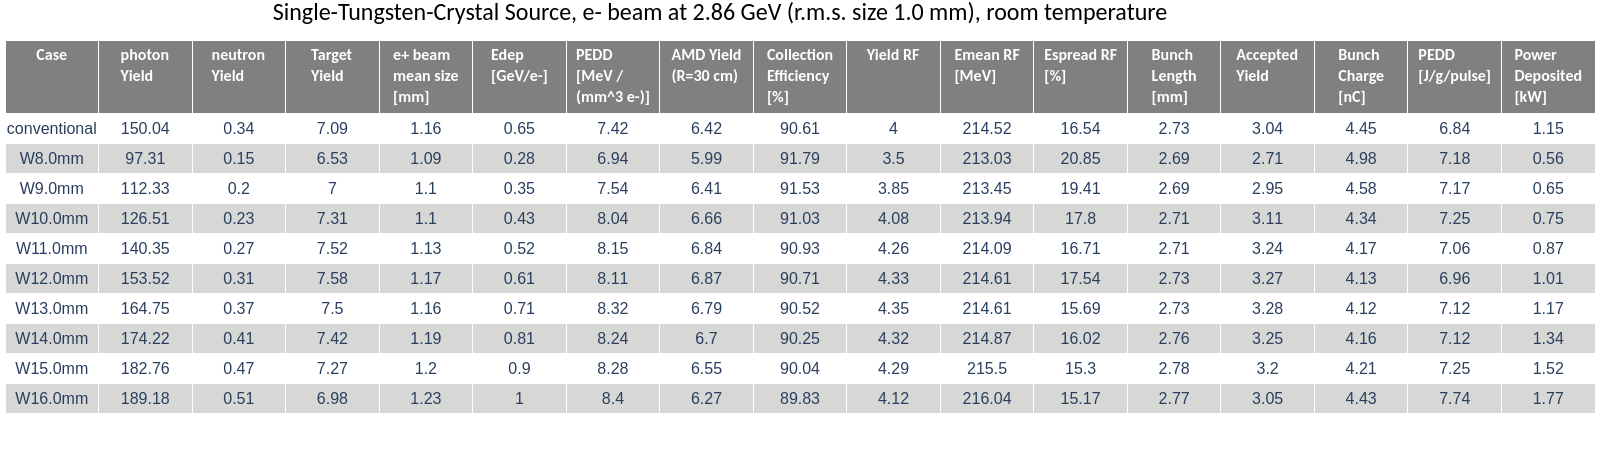

In [18]:
if save_results:
    save_dataframe(df_results, outpath+"results_"+basename_CS, plot_title, figsize=(1600, fig_height), header_fontsize=16, cell_fontsize=16)

## Plot main parameters

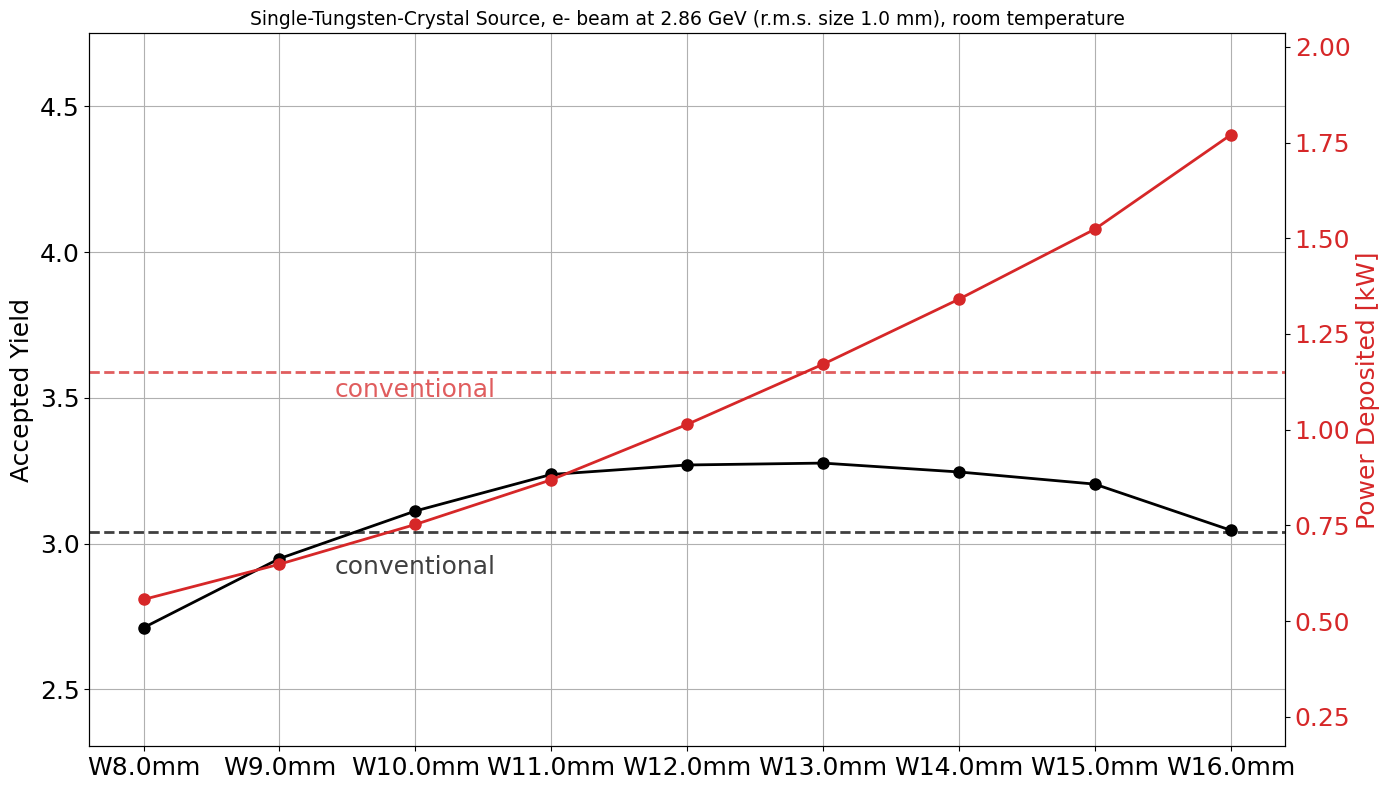

In [19]:
fig = plt.figure(figsize=(14, 8))
fs = 18
lw = 2
ms = 8
xtext = 2.0
cytext = 0.96

va2plot = 'Power Deposited [kW]'
#va2plot = 'PEDD [J/g/pulse]'

if insertAdditionalCase and 'additionalCase' in locals():
    ii = 2
else:
    ii = 1
    
if va2plot == 'Power Deposited [kW]':
    DyLimL_axix2 = 0.3
else:
    DyLimL_axix2 = 5.0

### Accepted Yield ###
plt.title(plot_title, fontsize=fs*0.75)
ax1 = plt.subplot(1,1,1)
ax1.set_xlabel('', fontsize=fs)
color = 'k'
ax1.set_ylabel('Accepted Yield', color=color, fontsize=fs)
ax1.plot(df_results.index.values[ii:], df_results['Accepted Yield'][ii:].values, color=color, \
         linestyle='-', linewidth=lw, marker='o', markersize=ms)
if insertConventionalResults: 
    ax1.axhline(y=df_results["Accepted Yield"].iloc[0], linestyle='--', linewidth=2, color=color, alpha=0.75)
    plt.text(xtext, df_results["Accepted Yield"].iloc[0]*cytext, \
             'conventional', ha='center', va='center', color=color, alpha=0.75, fontsize=fs)
ax1.tick_params(axis='y', color=color)
ax1.tick_params(axis='x', labelsize=fs, rotation=rot_value)
ax1.tick_params(axis='y', labelsize=fs)
#plt.yscale('log')
plt.ylim(np.min(df_results['Accepted Yield'][ii:].values)*0.85, np.max(df_results['Accepted Yield'][ii:].values)*1.45)
plt.grid(True)
### var2plot ###
color = 'tab:red'
ax2 = ax1.twinx()
ax2.set_ylabel(va2plot, color=color, fontsize=fs)
ax2.plot(df_results.index.values[ii:], df_results[va2plot][ii:].values, color=color, \
         linestyle='-', linewidth=2, marker='o', markersize=ms)
if insertConventionalResults: 
    ax2.axhline(y=df_results[va2plot].iloc[0], linestyle='--', linewidth=2, color=color, alpha=0.75)
    plt.text(xtext, df_results[va2plot].iloc[0]*cytext, \
             'conventional', ha='center', va='center', color=color, alpha=0.75, fontsize=fs)
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(axis='y', labelsize=fs)
plt.ylim(np.max([0, np.min(df_results[va2plot].values)*0.85-DyLimL_axix2]), np.max(df_results[va2plot].values)*1.15)
fig.tight_layout()
if save_results:
    plt.savefig(outpath+"yieldAnd"+va2plot.split(" ")[0]+"_"+basename_CS+".jpg", dpi=300)
plt.show()

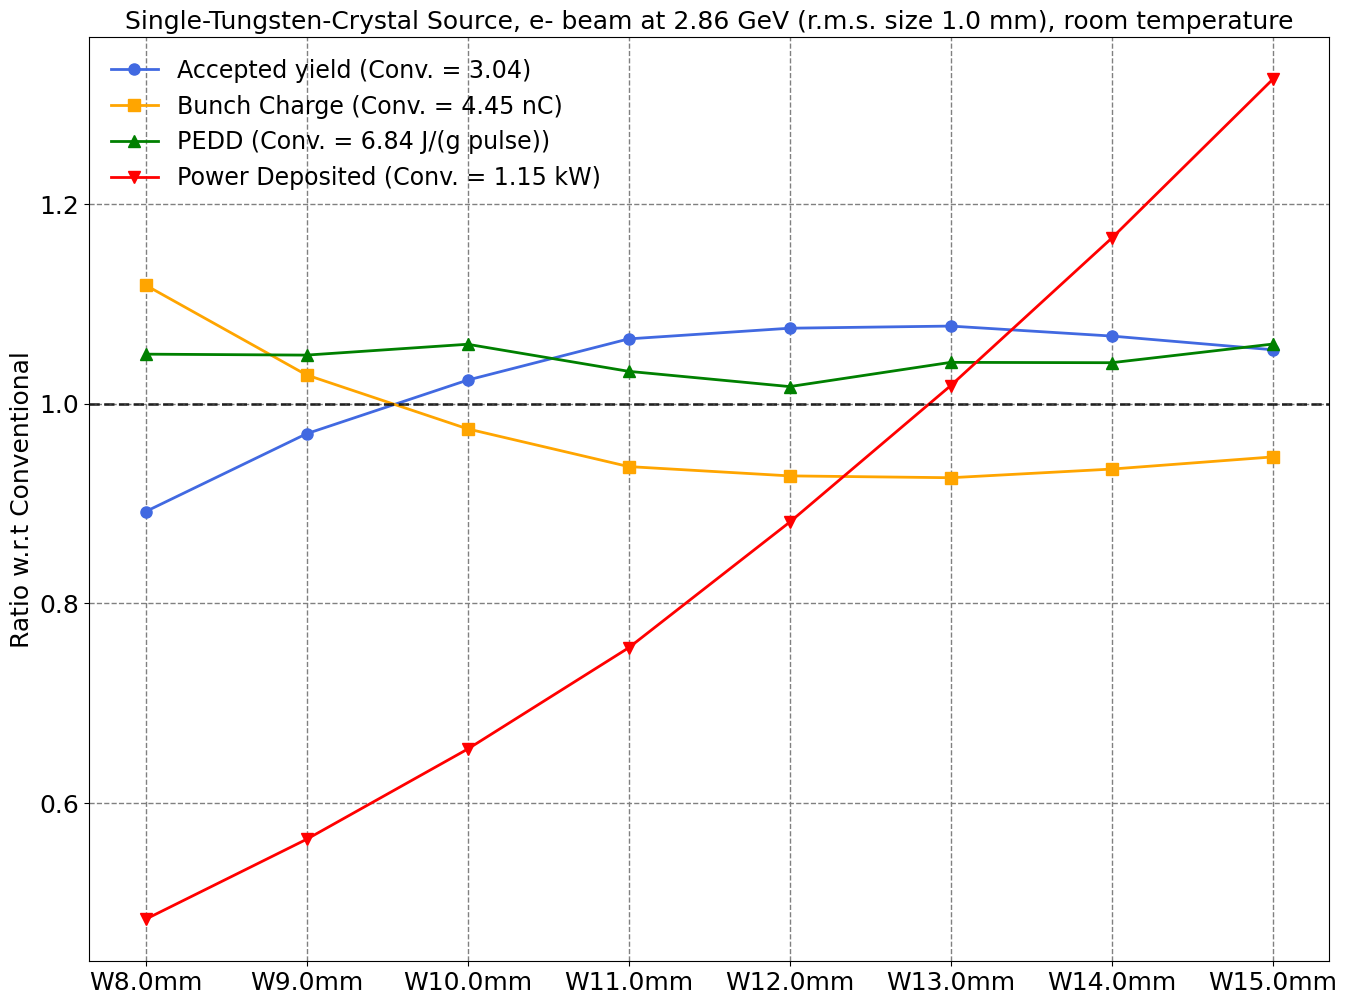

In [41]:
fig = plt.figure(figsize=(16, 12))
fs = 18
lw = 2
ms = 8
plt.plot(df_results.index.values[ii:-1], df_results['Accepted Yield'][ii:-1].values / conventionalResults[13], color='royalblue', \
         linestyle='-', linewidth=lw, marker='o', markersize=ms, label='Accepted yield (Conv. = %.2f)' % (conventionalResults[13]))
plt.plot(df_results.index.values[ii:-1], df_results['Bunch Charge [nC]'][ii:-1].values / conventionalResults[14], color='orange', \
         linestyle='-', linewidth=lw, marker='s', markersize=ms, label='Bunch Charge (Conv. = %.2f nC)' % (conventionalResults[14]))
plt.plot(df_results.index.values[ii:-1], df_results['PEDD [J/g/pulse]'][ii:-1].values / conventionalResults[15], color='green', \
         linestyle='-', linewidth=lw, marker='^', markersize=ms, label='PEDD (Conv. = %.2f J/(g pulse))' % (conventionalResults[15]))
plt.plot(df_results.index.values[ii:-1], df_results['Power Deposited [kW]'][ii:-1].values / conventionalResults[16], color='red', \
         linestyle='-', linewidth=lw, marker='v', markersize=ms, label='Power Deposited (Conv. = %.2f kW)' % (conventionalResults[16]))
plt.legend(fontsize=fs*0.95, frameon=False) #, loc='lower right') #, frameon=False)
plt.title(plot_title, fontsize=fs*1.)
plt.xlabel("", fontsize=fs)
plt.ylabel("Ratio w.r.t Conventional", fontsize=fs)
plt.xticks(fontsize=fs, rotation=rot_value)
plt.yticks(fontsize=fs, rotation=0)
#plt.ylim([0.5, 1.5])
plt.axhline(y=1.0, linestyle='--', linewidth=2, color='k', alpha=0.75)
#plt.axvspan(3, 7, alpha=0.5, color='bisque')
#plt.axvspan(0, 4, alpha=0.5, color='bisque')
plt.grid(which="major", color="gray", linestyle="--", linewidth=1)
if save_results:
    plt.savefig(outpath+"summary"+"_"+basename_CS+".jpg", dpi=300)
plt.show()